# Homework #2


## #1

x - Input feature(s) (typically a vector in general)
y - Actual output (ground truth label or real value)
yhat - Predicted output (hypothesis function's output)
θ - Parameter(s) of the model (vector in general)
hθ(x) - Hypothesis function (model's prediction function)
J(θ) - Optimization (cost/loss) function


## #2

Example: Optimizing Advertising Spend

Goal: Optimize advertising spend (θ) to maximize revenue 𝐽(𝜃).
θ = amount of money spent on online ads (e.g., Google Ads, Facebook Ads, etc.).
J(θ) = total revenue generated from the ad campaign.
Optimization Goal: Find the optimal ad spend 𝜃∗ that maximizes revenue.


## #3

To find the maximum or minumum of a function i.e. optimize it: We must take the derivative of the function at hand: 𝐽(𝜃).
Then find critical points by setting the derivative = 0 and solving.
In order to determine if its a maximum or minimum you can use the second derivative to see if its > 0 then its a local minimum. < 0 its a maximum, else you will need to use antoher method.


## Example 1:

Can you think of how to pose finding the mean of the four numbers 1, 3, 5 and 7 as an
optimization problem? Set up the problem (define θ and J(θ)) and list all steps to determine θ∗(analytical).
Then provide the pseudo-code to enable this to be implemented in a computer package.

θ=the mean value we are trying to find
J(θ):
The sum of squared differences between 𝜃 and each data point:

our function to solve is the sum of (xi - 𝜃)^2 from i=1 -> n where n = 4 as we have 4 numbers.
We need to take the derivative of this which looks like:

J(θ)=(1−θ)^2 +(3−θ)^2 +(5−θ)^2 +(7−θ)^2

derivative = 2(1−θ)(−1)+2(3−θ)(−1)+2(5−θ)(−1)+2(7−θ)(−1)
= -32 + 8𝜃
𝜃\* = 4

meaning that the optimized value is 4 i.e the mean is 4.

code to easily find optimization:


In [ ]:
def compute_mean(numbers):
    return sum(numbers) / len(numbers)


numbers = [1, 3, 5, 7]
theta_star = compute_mean(numbers)

print("Optimal θ* (Mean):", theta_star)

## Example 2:

Example 2. Can you find the maximum of the function f(x) = 3 –x -x2? First define θ, h(θ) and J(θ) , and then
show all steps as you determine h(θ∗). Then provide the pseudo-code to enable this to be implemented in a
computer package.

θ=x
J(θ) = f(x) = 3 - x - x^2
derivative with respect to θ = -1 - 2θ
θ = -1/2. Input -1/2 back into the back function and return 13/4. so the maximum occurs at (-1/2, 13/4)


In [1]:
import sympy as sp

# Define the variable
theta = sp.Symbol('theta')

# Define the function
J_theta = 3 - theta - theta**2

# Compute the first derivative
first_derivative = sp.diff(J_theta, theta)

# Solve for critical point (set first derivative to zero)
theta_star = sp.solve(first_derivative, theta)[0]

# Compute the second derivative
second_derivative = sp.diff(first_derivative, theta)

# Check concavity
if second_derivative.subs(theta, theta_star) < 0:
    max_value = J_theta.subs(theta, theta_star)
    print(f"Maximum occurs at θ* = {theta_star}")
    print(f"Maximum value h(θ*) = {max_value}")
else:
    print("No maximum found.")

Maximum occurs at θ* = -1/2
Maximum value h(θ*) = 13/4


Step 1: Define the Optimization Problem
We need to find the optimal straight-line fit for the given points:

(1, 1.5), (4,3.5), (7,9)

The equation of a straight line is: y=mx+b

Step 2: Define the Cost Function
We use the Mean Squared Error (MSE) as the cost function
1/n \* sum from i -> n (yi - (mxi + b))^2

where n = 3

we then take the partial derivatives with respect to m and b.

Implementation using numpy:


In [3]:
import numpy as np

# Given data points
x = np.array([1, 4, 7])
y = np.array([1.5, 3.5, 9])

# Compute least squares solution for linear regression
A = np.vstack([x, np.ones(len(x))]).T  # Design matrix
m, b = np.linalg.lstsq(A, y, rcond=None)[0]  # Solve for m and b

# Print results
print(f"Optimal slope (m*): {round(m, 2)}")
print(f"Optimal intercept (b*): {round(b, 2)}")

Optimal slope (m*): 1.25
Optimal intercept (b*): -0.33


# #3

### i.

By plotting out the graph we can see that the minimum is at θ = 3/2

### ii.

Using Gradient descent starting at θ = 5
compute the derivative first: The Gradient = 8θ - 12.
Using a learning rate of a = 0.1. our next θ = 5 - 0.1(8(5) - 12) == 2.2
Our new θ is 2.2. repeat this step and we get θ = 2.2 - 0.1(8(2.2) - 12) == 1.64
Repeat this multiple times and we can see that θ converges onto 1.5 i.e 3/2. So gradient descent correctly approaches the minumum value.


# #4

### Step 1

define the problem
equation of a traight line is y = mx+b
θ = [m,b]
h(x) = mx + b
Cost function = MSE Function where n=4 (number of points)

### Step 2

Compute the derivatives with respect to m and b

### Step 3

Gradient descent update rule
m = m - a(deriv with respect to m)
b = b - a(deriv with respect to b)

### Step 4

Compute iterations by hand.
We will start with m = 0 and b = 0, and a = 0.01
Compute all errors:
dJ/dm = -1/4 \* sum (xi(yi-yhat)) from i = 1 -> 4
= -1/4​[(1)(1.5)+(4)(3.5)+(7)(9)+(10)(8)] = -39.625
dJ/db = −1/4 [1.5+3.5+9+8]= -5.5

### Step 5

Now use this m1 and b1 predictions to compute new yhat values:
yhat1 = 0.39625(1)+0.055=0.45125
yhat2 = 0.39625(4)+0.055=1.64
yhat3 = 0.39625(7)+0.055=2.828
yhat4 = 0.39625(10)+0.055=4.015

Compute errors
1.5−0.45125=1.04875
3.5−1.64=1.86
9−2.828=6.172
8−4.015=3.985

Update m and b.
dJ/dm = -1/4[1.04875+7.44+43.204+39.85] = -22.8857
dJ/db = -1/4[1.04875+1.86+6.172+3.985] = -3.266

​
m2 = m1 − α(−22.8857)=0.39625+0.01(22.8857)=0.6251

b2 = b1 − α(−3.266)=0.055+0.01(3.266)=0.08766

### Step 7

Repeat until satisfied.


# #5


Iteration 1: theta = 3.60000, J(theta) = 17.64000
Iteration 2: theta = 2.76000, J(theta) = 6.35040
Iteration 3: theta = 2.25600, J(theta) = 2.28614
Iteration 4: theta = 1.95360, J(theta) = 0.82301
Iteration 5: theta = 1.77216, J(theta) = 0.29628
Iteration 6: theta = 1.66330, J(theta) = 0.10666
Iteration 7: theta = 1.59798, J(theta) = 0.03840
Iteration 8: theta = 1.55879, J(theta) = 0.01382
Iteration 9: theta = 1.53527, J(theta) = 0.00498
Iteration 10: theta = 1.52116, J(theta) = 0.00179
Iteration 11: theta = 1.51270, J(theta) = 0.00064
Iteration 12: theta = 1.50762, J(theta) = 0.00023
Iteration 13: theta = 1.50457, J(theta) = 0.00008
Iteration 14: theta = 1.50274, J(theta) = 0.00003
Iteration 15: theta = 1.50165, J(theta) = 0.00001


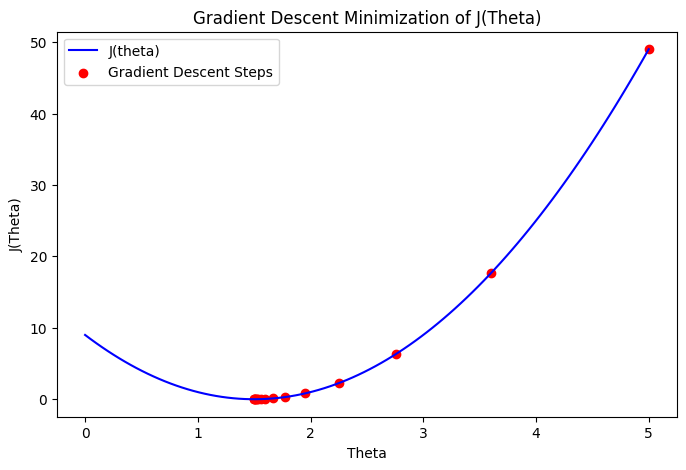

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function J(theta) and its gradient


def J(theta):
    return (2 * theta - 3) ** 2


def gradient(theta):
    return 4 * theta - 6  # Derivative of J(theta)


# Initialize parameters
alpha = 0.1  # Learning rate
theta = 5  # Initial value
iterations = 15  # Number of iterations

theta_values = [theta]
cost_values = [J(theta)]

# Perform Gradient Descent
for i in range(iterations):
    theta = theta - alpha * gradient(theta)
    theta_values.append(theta)
    cost_values.append(J(theta))
    print(f"Iteration {i+1}: theta = {theta:.5f}, J(theta) = {J(theta):.5f}")

# Plot J(theta) and Gradient Descent Steps
theta_range = np.linspace(0, 5, 100)
plt.figure(figsize=(8, 5))
plt.plot(theta_range, J(theta_range), label='J(theta)', color='blue')
plt.scatter(theta_values, cost_values, color='red',
            label='Gradient Descent Steps')
plt.xlabel("Theta")
plt.ylabel("J(Theta)")
plt.title("Gradient Descent Minimization of J(Theta)")
plt.legend()